In [155]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le

# Testing
import scipy
import scipy.stats as st

%matplotlib inline

In [156]:
print('Numpy Version : ' + np.__version__)
print('Pandas Version : ' + pd.__version__)
print('Matplotlib Version : ' + matplotlib.__version__)
print('Seaborn Version : ' + sns.__version__)
print('Scipy Version : ' + scipy.__version__)

Numpy Version : 1.18.5
Pandas Version : 1.0.5
Matplotlib Version : 3.2.2
Seaborn Version : 0.10.1
Scipy Version : 1.5.0


In [157]:
train = pd.read_csv('archive/train.csv')
# test = pd.read_csv('archive/test.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<h2>PROBLEM STATEMENT</h2>

<h3><em><strong>Memprediksi pemilik asuransi kesehatan yang akan tertarik dengan asuransi kendaraan.

<h2>DATA CLEANSING</h2>

In [80]:
# Finding Missing Value
data_missing_value = train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value = data_missing_value[data_missing_value['missing_value'] > 0]
data_missing_value['percentage'] = round((data_missing_value['missing_value'] / len(train)) * 100, 2)

data_missing_value

,feature,missing_value,percentage


In [88]:
# Finding Duplicates
train.duplicated().sum()

0

In [40]:
#Invalid Value
display(train.select_dtypes(include=['object']).columns)
print(train.select_dtypes(include=object).shape)
data_cat = train.select_dtypes(include=['object'])

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

(381109, 3)


In [41]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [42]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [44]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [46]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train.select_dtypes(include=numerics).columns)
print(train.select_dtypes(include=numerics).shape)
data_num = train.select_dtypes(include=numerics)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

(381109, 9)


In [57]:
train[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<h2>DATA EXPLORATION</h2>

Target Output : Feature <strong>RESPONSE</strong>

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [54]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [56]:
train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


<h2>FEATURE ENGINEERING</h2>

In [122]:
train_dummies = pd.get_dummies(train[['Gender', 'Vehicle_Damage', 'Vehicle_Age']])
train_dummies.columns = ['Gender_Female', 'Gender_Male', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2_Year', 'Vehicle_Age_<1_Year','Vehicle_Age_>2_Year']
train = pd.concat([train, train_dummies], axis=1)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_<1_Year,Vehicle_Age_>2_Year
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,1,0,1,0,0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,1,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,1,0,1,0,0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1,1,0,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0,1,0,0,1,0


In [123]:
train = train.drop(['id', 'Gender', 'Vehicle_Age', 'Vehicle_Damage'], axis=1)
train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_<1_Year,Vehicle_Age_>2_Year
0,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,1,0,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,1,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,1,0,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,1,0,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,1,0,0,1,0


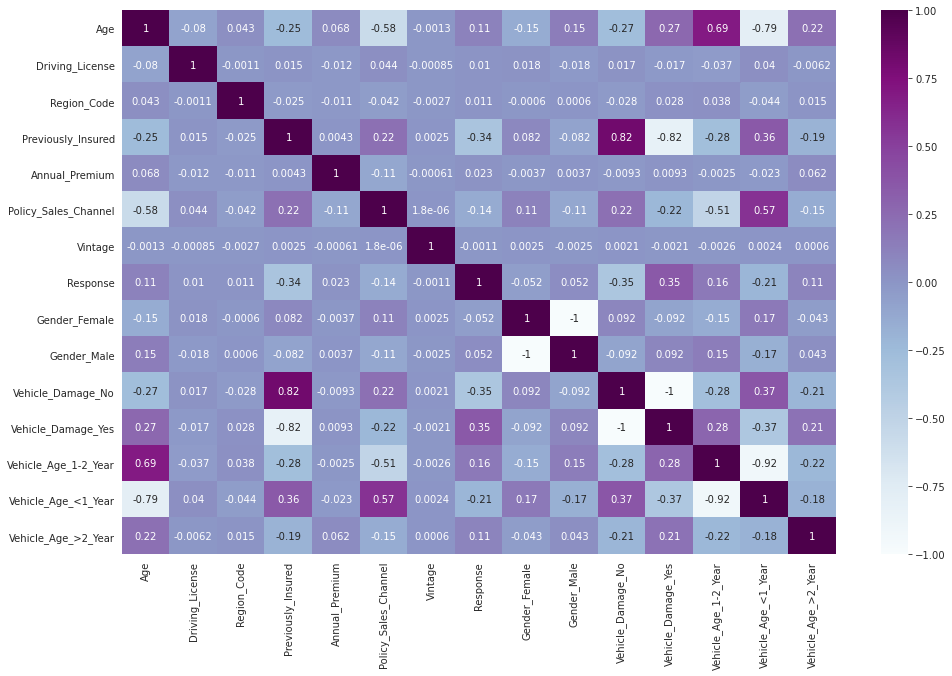

In [128]:
corr_= train.corr()
mask = np.zeros_like(corr_)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

In [133]:
train = train.drop(['Gender_Female', 'Vehicle_Damage_No', 'Vehicle_Age_<1_Year'], axis=1)
train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2_Year,Vehicle_Age_>2_Year
0,44,1,28.0,0,40454.0,26.0,217,1,1,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,0,0,0


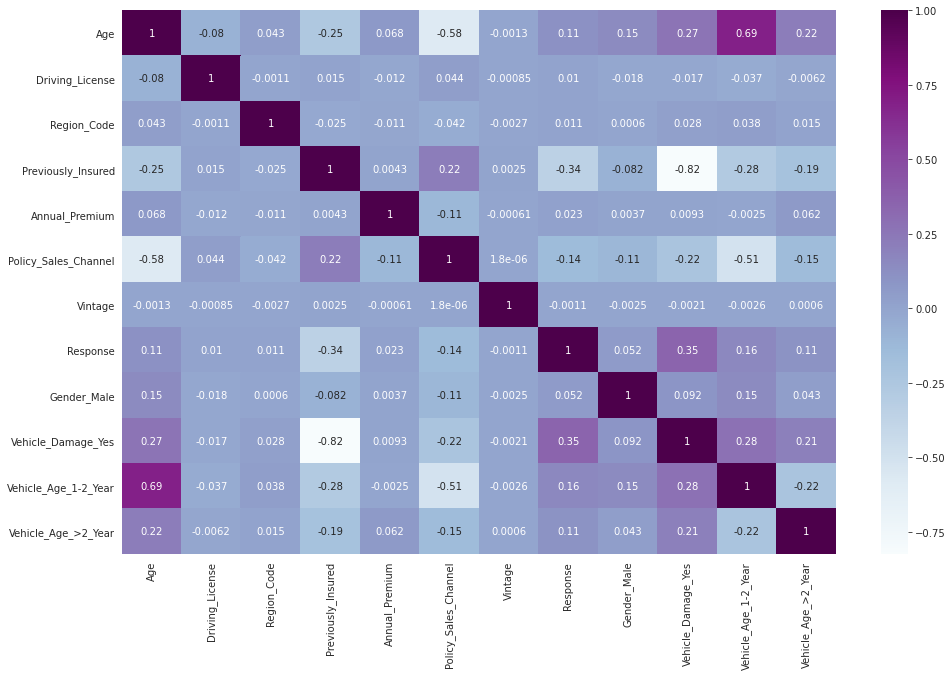

In [134]:
corr_= train.corr()
mask = np.zeros_like(corr_)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');

<h2>EXPLORATORY DATA ANALYST</h2> - <h4>Stage 2</h4>

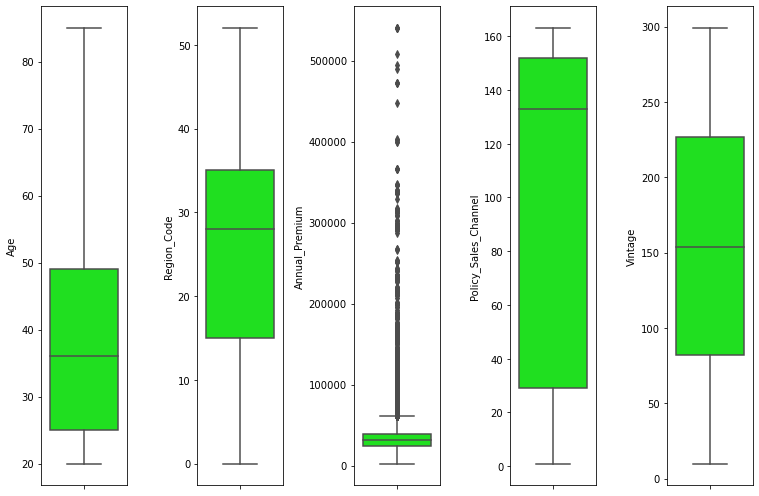

In [135]:
features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(train[features[i]],color='lime',orient='v')
    plt.tight_layout()
    
# plt.savefig('fig/numerical boxplot.png')

In [154]:
# train.shape
train[train['Annual_Premium'] > 100000]['Age'].count()

778

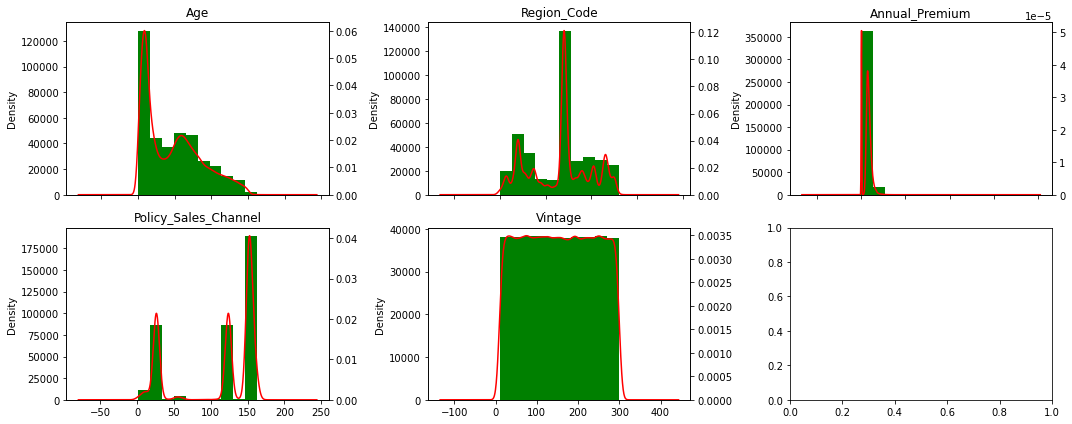

In [88]:
data_num = train[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()
# plt.savefig('fig/numerical distplot.png')

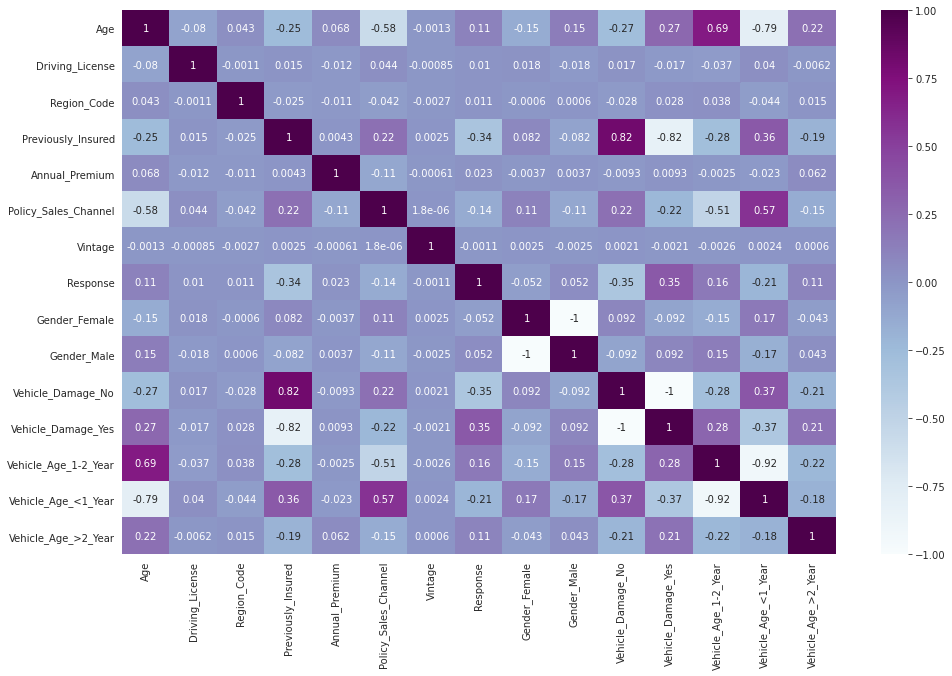

In [125]:
corr_= train.corr()
mask = np.zeros_like(corr_)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;
# plt.savefig('fig/matrix correlation.png');